In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("../experiments/output.csv")

In [65]:
df.head()

,datetime,product,display,num_slots,quantity_sold,price,revenue
0,2021-05-24 14:00:00,coca_cola_20oz_bottle,entrance-cooler,2,1.0,1.99,1.99
1,2021-05-24 14:00:00,dr_pepper_20oz_bottle,entrance-cooler,2,1.0,0.99,0.99
2,2021-05-24 14:00:00,diet_coke_20oz_bottle,entrance-cooler,2,0.0,1.99,0.00
3,2021-05-24 14:00:00,sprite_20oz_bottle,entrance-cooler,1,0.0,1.99,0.00
4,2021-05-24 14:00:00,Monster_16oz_can,entrance-cooler,1,4.0,2.99,11.96


In [66]:
# standardize
mu = df["revenue"].mean()
sig = df["revenue"].std()
df['revenue'] = (df['revenue'] - mu) / sig

# standardize
mu = df["quantity_sold"].mean()
sig = df["quantity_sold"].std()
df['quantity_sold'] = (df['quantity_sold'] - mu) / sig

In [67]:
df.head()

,datetime,product,display,num_slots,quantity_sold,price,revenue
0,2021-05-24 14:00:00,coca_cola_20oz_bottle,entrance-cooler,2,-0.303902,1.99,-0.357791
1,2021-05-24 14:00:00,dr_pepper_20oz_bottle,entrance-cooler,2,-0.303902,0.99,-0.510569
2,2021-05-24 14:00:00,diet_coke_20oz_bottle,entrance-cooler,2,-0.720116,1.99,-0.661819
3,2021-05-24 14:00:00,sprite_20oz_bottle,entrance-cooler,1,-0.720116,1.99,-0.661819
4,2021-05-24 14:00:00,Monster_16oz_can,entrance-cooler,1,0.944739,2.99,1.165404


In [68]:
groups = df[['display','product','num_slots','quantity_sold', 'revenue']].groupby(["display","product"]).sum()

In [69]:
groups.reset_index(inplace=True)

In [70]:
groups

,display,product,num_slots,quantity_sold,revenue
0,dairy-cooler,Monster_16oz_can,47,21.775246,25.955367
1,dairy-cooler,coca_cola_20oz_bottle,51,0.099099,-1.557243
2,dairy-cooler,diet_coke_20oz_bottle,23,-3.567546,-3.828178
3,dairy-cooler,dr_pepper_20oz_bottle,32,0.515312,-4.614330
4,dairy-cooler,sprite_20oz_bottle,23,-4.703876,-4.794026
5,deli-cooler,Monster_16oz_can,41,5.014385,7.431336
6,deli-cooler,coca_cola_20oz_bottle,30,-3.039021,-3.577913
7,deli-cooler,diet_coke_20oz_bottle,28,-5.232401,-5.044290
8,deli-cooler,dr_pepper_20oz_bottle,25,-7.201158,-6.618194
9,deli-cooler,sprite_20oz_bottle,36,-5.503271,-5.921163


In [71]:
colors = {
    'Monster_16oz_can':'green', 
    'coca_cola_20oz_bottle':'red', 
    'diet_coke_20oz_bottle':'gray', 
    'dr_pepper_20oz_bottle':'orange',
    'sprite_20oz_bottle': 'blue'
}

Text(0, 0.5, 'quantity sold')

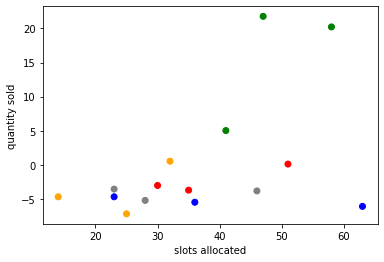

In [72]:
plt.scatter(groups["num_slots"], groups["quantity_sold"], c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("quantity sold")

Text(0, 0.5, 'total revenue')

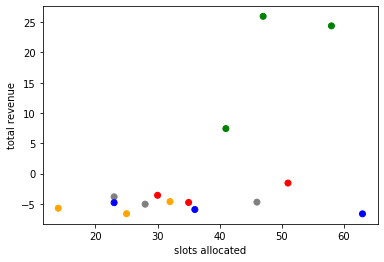

In [77]:
plt.scatter(groups["num_slots"], groups["revenue"],  c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("total revenue")

In [74]:
groups["q_sold_slope"] = groups['quantity_sold'] / groups['num_slots']
groups["revenue_slope"] = groups['revenue'] / groups['num_slots']

In [75]:
groups

,display,product,num_slots,quantity_sold,revenue,q_sold_slope,revenue_slope
0,dairy-cooler,Monster_16oz_can,47,21.775246,25.955367,0.463303,0.552242
1,dairy-cooler,coca_cola_20oz_bottle,51,0.099099,-1.557243,0.001943,-0.030534
2,dairy-cooler,diet_coke_20oz_bottle,23,-3.567546,-3.828178,-0.155111,-0.166443
3,dairy-cooler,dr_pepper_20oz_bottle,32,0.515312,-4.614330,0.016104,-0.144198
4,dairy-cooler,sprite_20oz_bottle,23,-4.703876,-4.794026,-0.204516,-0.208436
5,deli-cooler,Monster_16oz_can,41,5.014385,7.431336,0.122302,0.181252
6,deli-cooler,coca_cola_20oz_bottle,30,-3.039021,-3.577913,-0.101301,-0.119264
7,deli-cooler,diet_coke_20oz_bottle,28,-5.232401,-5.044290,-0.186871,-0.180153
8,deli-cooler,dr_pepper_20oz_bottle,25,-7.201158,-6.618194,-0.288046,-0.264728
9,deli-cooler,sprite_20oz_bottle,36,-5.503271,-5.921163,-0.152869,-0.164477


In [76]:
groups[['product', 'q_sold_slope', 'revenue_slope']].groupby("product").mean()

,q_sold_slope,revenue_slope
product,,
Monster_16oz_can,0.311424,0.384613
coca_cola_20oz_bottle,-0.068606,-0.095255
diet_coke_20oz_bottle,-0.141809,-0.149626
dr_pepper_20oz_bottle,-0.202645,-0.272277
sprite_20oz_bottle,-0.151462,-0.159419
